<a href="https://colab.research.google.com/github/latruonghai/CS114.K21/blob/master/DoAn_DPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage import io
from skimage.feature import hog
from skimage import exposure

# Feature Engineering


Anh trong thu muc se duoc xu ly de bien doi thanh dang doi tuong (object detection).


In [7]:
def read_img(path):
  image = []
  label = []
  for folder in os.listdir(path):
    for files in os.listdir(path+'/'+folder):
      file_name = path + '/' + folder + '/'+files
      img = io.imread(file_name)
      
      #img = cv2.resize(img,(216,216))
      img = rgb2gray(img)
      # Chuyen hinh anh ve dang cac dang object
      fd_perer, imgs_per = hog(img, orientations=8, pixels_per_cell=(8, 8),
                   cells_per_block=(3, 3), visualize=True)
      imgs_per = exposure.rescale_intensity(imgs_per,in_range = (0,0.04))
      #img_canny = canny(img, sigma=2)
      #hog()

      #imgss = np.round(img.flatten(), 2)
      #print(imgss)
      imgs = np.reshape(imgs_per,216*216)
      #image.append(img)
      image.append(imgs)
      label.append(folder)
  return np.round(np.asarray(image),2),np.asarray(label,dtype='object')

In [8]:
path_train = 'gdrive/My Drive/ML/Train'
path_test = 'gdrive/My Drive/ML/Test'

x_train,y_train = read_img(path_train)
x_test,y_test = read_img(path_test)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

TypeError: ignored

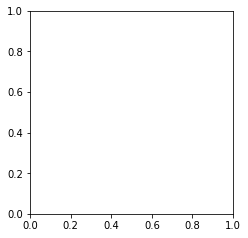

In [9]:
"""fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(x_train[0],cmap = "binary")
#ax2 = fig.add_subplot(1,2, 2)
print(y_train[0])
#ax2.imshow(dog_edges, cmap='binary')"""

Sau khi "feature engineering"

In [10]:

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


them cac thu vien can thiet

In [13]:
#from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#pca = PCA(n_components = 50, whiten = True, random_state = 0)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
lr = LogisticRegression()
pipeline_lr = make_pipeline(lr)
pipeline_svc = make_pipeline(svc)

Dung pipeline de rut gon qua trinh chay cua model.

Sau do dung GridSearchCV de tim ra tham so toi uu cho model

In [14]:
pipeline_svc

Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [15]:

from sklearn.model_selection import learning_curve, GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
param_lr_grid = {'logisticregression__C': [1, 5, 10, 50],
              'logisticregression__tol':[0.01,0.001,0.0001]}
grid = GridSearchCV(pipeline_svc, param_grid)
grid_lr = GridSearchCV(pipeline_lr,param_lr_grid)

%time grid.fit(x_train, y_train)
print(grid.best_params_)
%time grid_lr.fit(x_train,y_train)
print(grid_lr.best_params_)

CPU times: user 19min 1s, sys: 238 ms, total: 19min 2s
Wall time: 19min 3s
{'svc__C': 5, 'svc__gamma': 0.0005}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CPU times: user 12min 44s, sys: 1min 55s, total: 14min 40s
Wall time: 7min 28s
{'logisticregression__C': 10, 'logisticregression__tol': 0.001}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:

grid.best_estimator_

Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=5, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.0005,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [17]:
grid_lr.best_estimator_

Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [18]:
model_svc = grid.best_estimator_.predict(x_test)
model_lr = grid_lr.best_estimator_.predict(x_test)

In [19]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("LR's Accuracy: ", accuracy_score(y_test, model_svc))

print("SVC's Accuracy: ",accuracy_score(y_test,model_lr))

LR's Accuracy:  0.71
SVC's Accuracy:  0.7


Model linear regression co accuray: 0.69
--> Cai thien hon

In [20]:
model_svc = grid.best_estimator_.predict(x_test)

In [21]:
print(accuracy_score(y_test,model_svc))

0.71


Model svc co accuracy: 0.71

In [22]:
print(classification_report(y_test,model_lr))

              precision    recall  f1-score   support

        Amee       0.65      0.55      0.59        20
         MTP       0.74      0.85      0.79        20
       MyTam       0.77      0.50      0.61        20
        NDLN       0.55      0.80      0.65        20
   TranThanh       0.89      0.80      0.84        20

    accuracy                           0.70       100
   macro avg       0.72      0.70      0.70       100
weighted avg       0.72      0.70      0.70       100



In [23]:
print(classification_report(y_test,model_svc))

              precision    recall  f1-score   support

        Amee       0.64      0.45      0.53        20
         MTP       0.79      0.95      0.86        20
       MyTam       0.67      0.60      0.63        20
        NDLN       0.58      0.75      0.65        20
   TranThanh       0.89      0.80      0.84        20

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.71      0.71      0.70       100



Ma Tran Confusion: Danh gia do chinh xac

# Test voi du lieu moi

Tap Tin Test

In [25]:
pipeline_svc = grid.best_estimator_

Tap Tin Val

Thu Tap Tin Moi

In [51]:
from google.colab.patches import cv2_imshow

In [52]:
def crop_face(path):
  faceCasCade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
  cap = cv2.VideoCapture(0)

  # Doc hinh

  img = cv2.imread(path)
  img  = cv2.resize(img,(400,int(img.shape[0]*400/img.shape[1])))
  img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
  img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
  # convert the YUV image back to RGB format
  img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
      #grayImag = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face = faceCasCade.detectMultiScale(
          img_output,
          scaleFactor = 1.1,
          minNeighbors = 5,
          minSize = (30,30))
      #Vẽ các đường màu xanh lá quanh khuôn mặt
  for (x,y,w,h) in face:
    #sampleNum=sampleNum+1
    image = img[y:y+h,x:x+w]
          #Lưu ảnh khuôn mặt vào thư mục có tên(creatình
          #if not os.path.exists(path +'/'+createf): os.mkdir(path +'/'+createf)
          # Thểm ảnh xoay
          # Thêm ảnh đã cắt
          #cv2.imwrite(path+'/'+createf+"/"+name_file+'-'+ str(sampleNum) + ".jpg", cv2.resize(image,(216,216)))
      # Hiển thị ra màn hình
    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0), 2)
          #if sampleNum>200:
              #break
  #cv2_imshow(image)
  return image

def read(img):
  #file_name = "131.jpg"
  #img = io.imread(file_name)
        
  img = cv2.resize(img,(216,216))
  img = rgb2gray(img)
        # Chuyen hinh anh ve dang cac dang object
  fd_perer, imgs_per = hog(img, orientations=8, pixels_per_cell=(8, 8),
              cells_per_block=(3, 3), visualize=True)
  imgs_per = exposure.rescale_intensity(imgs_per,in_range = (0,0.04))
        #img_canny = canny(img, sigma=2)
        #hog()

        #imgss = np.round(img.flatten(), 2)
        #print(imgss)
  imgs = np.reshape(imgs_per,216*216)
  return np.round(np.asarray([imgs]),2)

In [68]:
from google.colab import files
files.upload()
#from google.colab.patches import cv2_imshow

Saving LN.jpg to LN.jpg


{'LN.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00\x04*\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [69]:
paths = "LN.jpg"
iamg = cv2.imread(paths)
iam = crop_face(paths)

test_x = read(iam)

In [70]:
pred = grid.best_estimator_.predict(test_x)
preds = grid_lr.best_estimator_.predict(test_x)

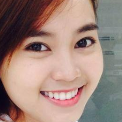

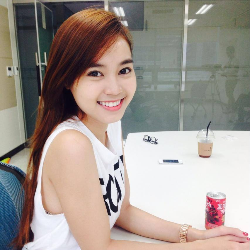

NDLN
# SVC


In [71]:
cv2_imshow(iam)

cv2_imshow(cv2.resize(iamg,(250,int(250*iamg.shape[0]/iamg.shape[1]))))
print(pred[0])
print('# SVC')

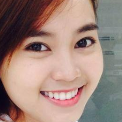

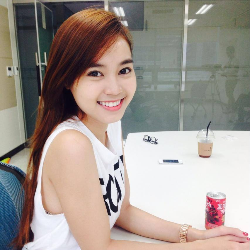

NDLN
# LR


In [72]:
cv2_imshow(iam)
cv2_imshow(cv2.resize(iamg,(250,int(250*iamg.shape[0]/iamg.shape[1]))))
print(preds[0])
print('# LR')